In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *



In [2]:
import random  # Ensure we are using the correct random module


def generate_sparse_matrix_fixed(n, m, non_zero_count, value_choices):
    """
    Generates a sparse matrix of size (n, m) with a given number of non-zero entries.

    Parameters:
    - n: number of rows
    - m: number of columns
    - non_zero_count: number of non-zero entries in the matrix
    - value_choices: list of values to randomly choose the non-zero entries from

    Returns:
    - sparse_matrix: A scipy csr_matrix (Compressed Sparse Row) representation
    """
    # Ensure the number of non-zero elements does not exceed total matrix size
    if non_zero_count > n * m:
        raise ValueError("The number of non-zero entries exceeds the matrix size.")
    
    # Generate random positions for the non-zero elements
    positions = random.sample(range(n * m), non_zero_count)
    
    # Map positions to (row, column) indices
    row_indices = [pos // m for pos in positions]
    col_indices = [pos % m for pos in positions]
    
    # Generate random values for the non-zero entries
    values = [random.choice(value_choices) for _ in range(non_zero_count)]
    
    # Create a sparse matrix using csr_matrix
    sparse_matrix = csc_matrix((values, (row_indices, col_indices)), shape=(n, m))
    
    return sparse_matrix

# Example usage
n = 1000    # Matrix dimensions
r = 10      # Rank
m = 120000  # Cardinality
non_zero_count = int(n*m*.1)
value_choices = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

sparse_matrix_fixed = generate_sparse_matrix_fixed(n, m, non_zero_count, value_choices)
print(sparse_matrix_fixed.toarray())  # Convert to dense format for display


[[0.  0.  3.5 ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 5.  0.  0. ]
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  1.  0. ]]


In [ ]:
def generate_sparse_low_rank_matrix(n, m, k, non_zero_count, value_choices):
    """
    Generates a sparse and low-rank matrix of size (n, m) with rank k and a given number of non-zero entries in CSC format.

    Parameters:
    - n: number of rows
    - m: number of columns
    - k: desired rank of the matrix
    - non_zero_count: number of non-zero entries in the matrix
    - value_choices: list of values to randomly choose the non-zero entries from

    Returns:
    - sparse_matrix: A scipy csc_matrix (Compressed Sparse Column) representation
    """
    # Ensure the number of non-zero elements does not exceed total matrix size
    if non_zero_count > n * m:
        raise ValueError("The number of non-zero entries exceeds the matrix size.")
    
    # Generate two smaller random matrices of sizes (n, k) and (k, m) to create a low-rank matrix
    A = np.random.choice(value_choices, size=(n, k))
    B = np.random.choice(value_choices, size=(k, m))
    
    # Multiply to create a low-rank matrix (n x m) of rank k
    low_rank_matrix = A @ B
    
    # Generate random positions for the non-zero elements
    positions = random.sample(range(n * m), non_zero_count)
    
    # Initialize row and column indices for the sparse matrix
    row_indices = [pos // m for pos in positions]
    col_indices = [pos % m for pos in positions]
    
    # Use values from the low-rank matrix at the chosen positions
    values = [low_rank_matrix[row, col] for row, col in zip(row_indices, col_indices)]
    
    # Create a sparse matrix using csc_matrix
    sparse_matrix = csc_matrix((values, (row_indices, col_indices)), shape=(n, m))
    
    return sparse_matrix


In [3]:

def visualizeData(dense_matrix):
    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    plt.imshow(dense_matrix, cmap='viridis', aspect='auto', interpolation='none')
    plt.colorbar(label='Intensity')
    plt.title('dense matrix visualization of part of data')
    plt.xlabel('movies')
    plt.ylabel('users')

    # Show the plot
    plt.show()


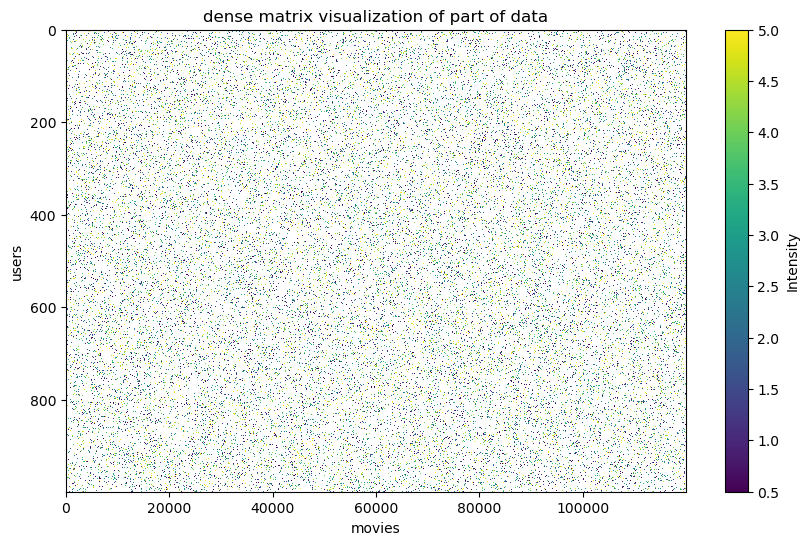

In [4]:
visualizeData(np.where(sparse_matrix_fixed.toarray()==0, np.nan, sparse_matrix_fixed.toarray()))

In [15]:
def save_sparse_matrix_to_npy(filename, sparse_matrix):
    """
    Saves a given sparse matrix in CSC format to an .npy file.

    Parameters:
    - filename: Name of the file to save the matrix to (should include the .npy extension)
    - sparse_matrix: The sparse matrix to be saved
    """
    # Convert the sparse matrix to a dense array before saving
    np.save(filename, sparse_matrix)

In [5]:
np.save('artificialRatings2.npy', sparse_matrix_fixed )

In [17]:
loaded_matrix = np.load('artificialRatings1.npy', allow_pickle=True).item()

In [19]:
loaded_matrix.toarray()

array([[0. , 5. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 2.5, 0. , ..., 0. , 0. , 0. ]])